## Curvature analysis of 3D segmented LARFP lumen (from LARFP_lumen_segmentation)
#### INPUTS: 
    segmentation stack
    pixel resolution
        
#### OUTPUTS:
    filename_t_contour_stack.pickle (in between step)
    filename_t_fit_params.pickle
    filename_t_mean_curvature.pickle (has all mean curvatures)

@author: clauvasq & vipul

#### import packages & functions

In [1]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
#import cv2
import pickle
import os
import time
import json
from fourier_contour_fit import *
from lumen_mean_curvature_CGV_VV import *

#### parameters: filenames, frames, xy- and z-resolutions
and loads segmented data

In [8]:
# output directory
data_dir = '/Users/clauvasq/Documents/Python/lumen_curvature_3D/output/'

# specify dataset and timePt to analyze
filename, timePt = '190418_09', 1

# specify xy_resolution and z_resolution (um/pixel)
xy_res, z_res = 0.1030, 0.1

# makes new directory to place contour data
data_dir += filename + '/'
seg_dir = data_dir + 'seg/'
contour_fit_dir = data_dir + 'contours_fits_curvature/'
os.mkdir(contour_fit_dir)

z_height = z_res/xy_res # z-slice to xy-pixel size

if timePt < 10:
        filename_t = filename + '_t0' + str(timePt)
else:
    filename_t = filename + '_t' + str(timePt)

# load segmented lumen into z_stack
z_stack = io.imread(seg_dir + filename_t + '.tif')

#### do all curvature analysis
makes smoothed contours, find fits, and calculate mean curvatures
    inputs: z_stack, z_height, pw + file root

In [9]:
print(filename_t)
start_t = time.time()
H_arr = make_curvature_array(z_stack, z_height, contour_fit_dir + filename_t)
os.system('say "donezo!"')
end_t = time.time()
total_t = int((end_t - start_t)/60)
print('This function takes ' + str(total_t) + ' min to run')

190418_09_t01
Made Contours. Fitting smooth curves...
z-slice completed: 107
z-slice completed: 108
z-slice completed: 109
z-slice completed: 110
z-slice completed: 111
z-slice completed: 112
z-slice completed: 113
z-slice completed: 114
z-slice completed: 115
z-slice completed: 116
z-slice completed: 117


/opt/anaconda3/envs/basic/lib/python3.7/site-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


z-slice completed: 118
z-slice completed: 119
z-slice completed: 120
z-slice completed: 121
z-slice completed: 122
z-slice completed: 123
z-slice completed: 124
z-slice completed: 125
z-slice completed: 126
z-slice completed: 127
z-slice completed: 128
z-slice completed: 129
z-slice completed: 130
z-slice completed: 131
z-slice completed: 132
z-slice completed: 133
z-slice completed: 134
z-slice completed: 135
z-slice completed: 136
z-slice completed: 137
z-slice completed: 138
z-slice completed: 139
z-slice completed: 140
z-slice completed: 141
z-slice completed: 142
z-slice completed: 143
z-slice completed: 144
z-slice completed: 145
z-slice completed: 146
z-slice completed: 147
z-slice completed: 148
z-slice completed: 149
z-slice completed: 150
z-slice completed: 151
z-slice completed: 152
z-slice completed: 153
z-slice completed: 154
z-slice completed: 155
z-slice completed: 156
z-slice completed: 157
z-slice completed: 158
z-slice completed: 159
z-slice completed: 160
z-slice com

/Users/clauvasq/Documents/Python/lumen_curvature_3D/clean_code/lumen_mean_curvature_CGV_VV.py:807: UserWarning: /Users/clauvasq/Documents/Python/lumen_curvature_3D/output/190418_09/contours_fits_curvature/190418_09_t01_scale=13.087520507553487_offset=2.0017094565181472.tiff is a low contrast image
  io.imsave(name+'_scale='+str(scale_factor)+'_offset='+str(offset)+'.tiff', output_arr)


This function takes 22 min to run


#### Plot smoothed contours

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x111289390>)

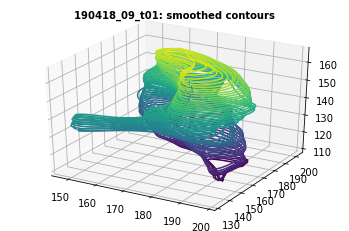

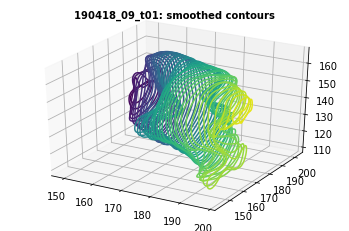

In [10]:
# load fourier fits
fit_pickle = open(contour_fit_dir + filename_t + '_fit_params.pickle', 'rb')
all_fit_params = pickle.load(fit_pickle)
fit_pickle.close()
z_fit_params = all_fit_params['z']
x_fit_params = all_fit_params['x']

# plots contours from z-slices and from x-slices
plot_smoothed_contours_3D(z_fit_params, filename_t, pw=contour_fit_dir)
plot_smoothed_contours_3D(x_fit_params, filename_t, z=False, pw=contour_fit_dir)     

#### plot mean curvature array

In [11]:
# load mean_curvature array
H_pickle = open(contour_fit_dir + filename_t + '_mean_curvature.pickle', 'rb')
H_arr = pickle.load(H_pickle)
H_pickle.close()
# plot mean curvatures, saves png
v=False # don't have vol. measurement yet, so plots are NOT vol. norm.
plot_mean_curv_3D(H_arr, xy_res, z_res, v, filename_t, data_dir)
# plot mean curvatures,  animates & saves mp4
plot_mean_curv_3D_mp4(H_arr, xy_res, z_res, filename_t, data_dir)
plt.close('all')